In [1]:
import statsmodels.api as sm

In [2]:
import matplotlib.pyplot as plt

In [3]:
from warnings import simplefilter
plt.style.use("Solarize_Light2")
simplefilter('ignore')

In [4]:
import statsmodels.api as sm

# Load the sunspots dataset
data = sm.datasets.sunspots.load_pandas().data

# Print some information about the dataset
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [5]:
import pandas as pd
data.index = pd.Index(sm.tsa.datetools.dates_from_range("1700","2008"))
data.index.freq = pd.infer_freq(data.index)
del data['YEAR']

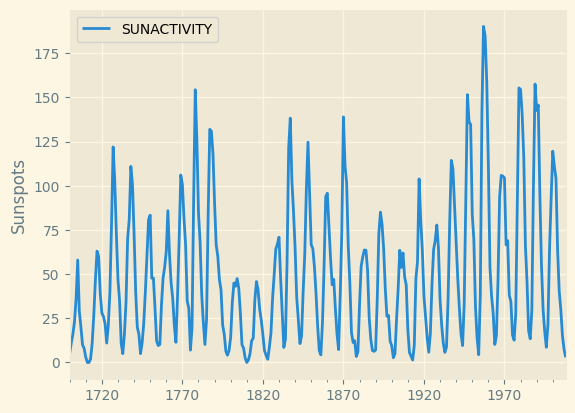

In [6]:
ax = data.plot()
ax.set_ylabel('Sunspots')
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
result = adfuller(data['SUNACTIVITY'])

In [9]:
print(result)

(-2.8377807249381966, 0.05307642172812041, 8, 300, {'1%': -3.4523371197407404, '5%': -2.871222860740741, '10%': -2.571929211111111}, 2430.50034229055)


In [10]:
pvalue = result[1]

In [11]:
if pvalue < 0.05:
    print('Stationary')
else:
    print("non stationary")

non stationary


In [12]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

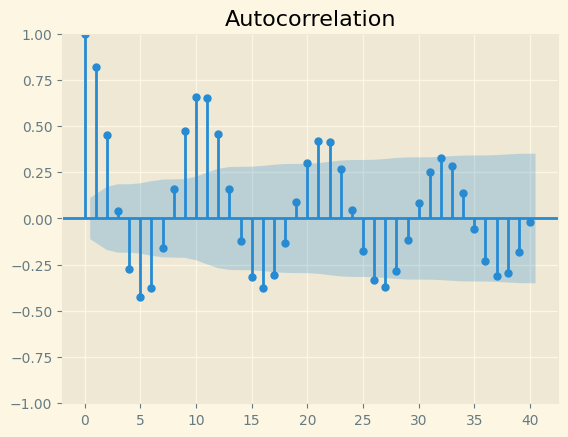

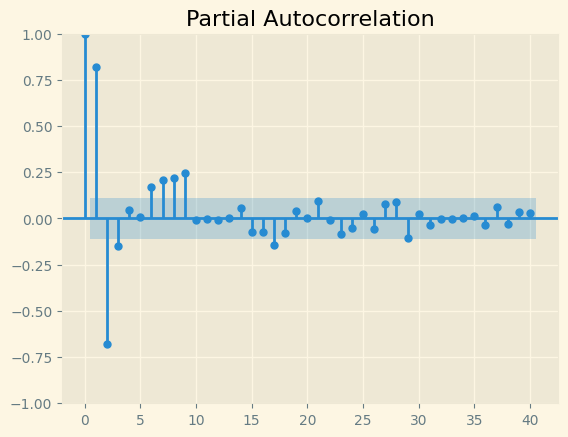

In [13]:
plot_acf(data['SUNACTIVITY'],lags=40)
plot_pacf(data['SUNACTIVITY'],lags=40)
plt.show()

In [14]:
    from sklearn.metrics import r2_score
    from statsmodels.tsa.arima.model import ARIMA

In [15]:
mod = ARIMA(list(data['SUNACTIVITY']),order = (1,0,1))
res = mod.fit()
pred = res.predict()
print(r2_score(data,pred))

0.7707182067781486


Text(0.5, 0, 'TimeSteps')

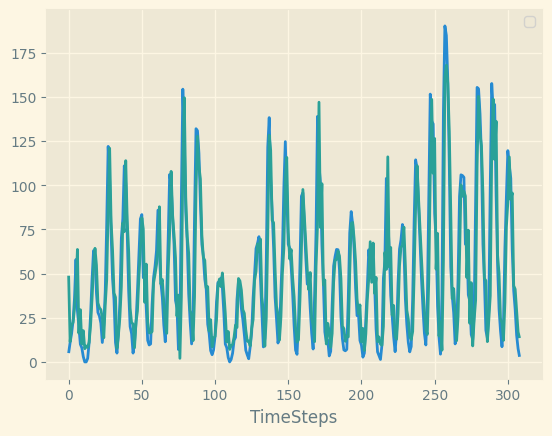

In [16]:
plt.plot(list(data['SUNACTIVITY']))
plt.plot(pred)
plt.legend(['Actual Sunspots'],['Predicted Sunspots'])
plt.xlabel('TimeSteps')

Text(0.5, 0, 'residual')

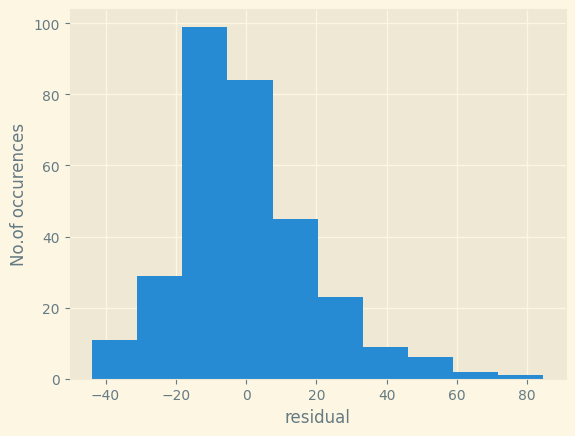

In [17]:
ax = pd.Series(res.resid).hist()
ax.set_ylabel('No.of occurences')
ax.set_xlabel('residual')

In [18]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  309
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1352.613
Date:                Thu, 13 Mar 2025   AIC                           2713.226
Time:                        18:50:33   BIC                           2728.160
Sample:                             0   HQIC                          2719.197
                                - 309                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.7921      8.077      6.041      0.000      32.962      64.623
ar.L1          0.7355      0.046     15.921      0.000       0.645       0.826
ma.L1          0.5194      0.048     10.798      0.000       0.425       0.614
sigma2       369.1788     25.783     14.319      0.000     318.646     419.712
===================================================================================
Ljung-Box (L1) (Q):                   9.89   Jarque-Bera (JB):                73.24
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.93   Skew:                             0.89
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
data_array = data.values
avg_errors = []
for p in range(13):
    for q in range(13):
        errors=[]
        tscv = TimeSeriesSplit(test_size=10)
        for train_index,test_index in tscv.split(data_array):
            x_train, x_test = data_array[train_index],data_array[test_index]
            x_test_orig = x_test
            fcst = []
            for stop in range(10):
                try:
                    mod = ARIMA(x_train,order = (p,0,q))
                    res = mod.fit()
                    fcst.append(res.forecast(steps=1))
                except:
                    print("errored")
                    fcst.append(-9999999.)
                x_train = np.concatenate((x_train,x_test[0:1,:]))
                x_test = x_test[1:]
            errors.append(r2_score(x_test_orig,fcst))
        pq_result = [p,q,np.mean(errors)]
        print(pq_result)
        avg_errors.append(pq_result)
avg_errors = pd.DataFrame(avg_errors)
result = avg_errors.pivot(index = 'p',columns ='q')

[0, 0, -0.19537571819352045]
[0, 1, 0.5148074142033573]
[0, 2, 0.6923588279105777]
[0, 3, 0.7314810255983216]
[0, 4, 0.7709250142047459]
[0, 5, 0.7808142441874916]
[0, 6, 0.7786789177465814]


In [20]:
avg_errors = pd.DataFrame(avg_errors)
avg_errors.columns = ['p','q','error']
result =  avg_errors.pivot(index ='p',columns='q')

In [ ]:
data_array = data.values
X_train, X_test = data_array[:-10],data_array[-10:]
X_test_orig = x_test
fcst = []
for step in range(10):
    mod = ARIMA(X_train,order=(10,9,9))
    res = mod.fit()
    fcst.append(res.frecast(steps=1))
    X_train = np.concatenate((X_train,X_test[0:1,1]))
    X_test = X_test[1:]
plt.plot(X_test_orig)
plt.plot(fcst)
plt.legend(['Actual sunspots','Predicted sunspots'])
plt.xlabel("Time steps of test data")
plt.show()